In [15]:
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv("Twitter_Data.csv")

In [3]:
df.head(4)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

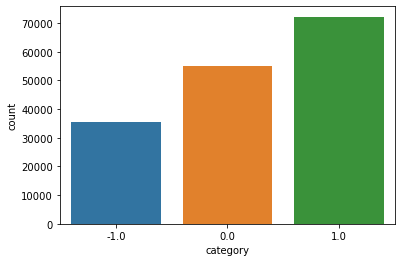

In [4]:
sns.countplot(df["category"])

In [5]:
df.shape

(162980, 2)

In [8]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [7]:
df = df.dropna()

In [13]:
Xfeatures = df['clean_text']
ylabels = df['category']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)

In [16]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [18]:
pipe_lr.fit(x_train,y_train)

/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
pipe_lr.score(x_test,y_test)


0.9413184430672312

In [ ]:
eg = ""

In [21]:
pipe_lr.predict(["AI is going to permanently change how marketing works."])

array([0.])

In [22]:
pipe_lr.predict(["Meeting many people is important, but understanding whom to meet many times is even more "])

array([1.])

In [23]:
pipe_lr.predict(['How do you feel when you hear your age group people and friends death news or heart attack news?'])

array([0.])

In [33]:
prediction = pipe_lr.predict(['Fake news media is the enemy of the people!  Trump called it!'])
if (prediction[0] == -1):
    print("negative")
elif (prediction[0] == 1):
    print("positive")
else:
    print("neutral")

negative


In [35]:
prediction = pipe_lr.predict(['What kind of journalism is this, How low can you go for clicks?'])
if (prediction[0] == -1):
    print("negative")
elif (prediction[0] == 1):
    print("positive")
else:
    print("neutral")

positive
